# Covariance and Correlation Matrices

### Dot Product Uses

1. Matrix by Vector
  * use vector values as coefficients to multiply row-by-row in matrix
  * take linear combination of columns
2. Transpose of Matrix by Itself
  * produce square matrix describing relationships between columns of original

In [1]:
import numpy as np
import pandas as pd

# build DataFrame of rectangle measurements

df = pd.DataFrame()
rows = 100
df["w_in"] = np.random.uniform(5,50,rows) # in inches
df["h_in"] = np.random.uniform(5,50,rows)
df["border_in"] = 2*df["w_in"] + 2*df["h_in"]
df["w_cm"] = df["w_in"] * 2.54
df["h_cm"] = df["h_in"] * 2.54
df += np.random.normal(size=(df.shape))
df.head(10)

,w_in,h_in,border_in,w_cm,h_cm
0,8.159544,26.277036,62.749219,21.772423,61.032916
1,18.028830,44.683923,123.119163,46.876885,113.738598
2,24.458442,23.067438,98.986402,68.684108,60.365147
3,35.251781,44.645117,160.862469,92.698729,110.743975
4,20.017957,24.135788,89.200477,46.324748,63.374942
5,47.419410,12.177315,113.877156,116.581043,28.465230
6,34.697197,46.485090,159.000460,88.121677,119.243674
7,38.518915,35.844671,143.869647,94.643547,87.503231
8,42.390417,44.779578,177.666311,105.621461,115.939723
9,15.042688,46.469566,122.887673,39.746403,115.089801


## Covariance Matrix

In [8]:
df0 = df - df.mean()
df0.head()

,w_in,h_in,border_in,w_cm,h_cm
0,-19.799018,-2.036255,-49.728916,-49.273765,-10.841511
1,-9.929732,16.370632,10.641028,-24.169303,41.864172
2,-3.500121,-5.245853,-13.491733,-2.362080,-11.509279
3,7.293219,16.331826,48.384334,21.652541,38.869548
4,-7.940605,-4.177503,-23.277658,-24.721440,-8.499484


In [20]:
cov = np.dot(df0.T, df0) / (len(df) - 1)
cov = pd.DataFrame(cov, columns=df0.columns, index=df0.columns)
assert np.allclose(df.cov(), cov)
cov

,w_in,h_in,border_in,w_cm,h_cm
w_in,166.501552,-9.673027,314.847333,417.608991,-17.789090
h_in,-9.673027,178.776077,336.361813,-26.721523,455.829626
border_in,314.847333,336.361813,1311.715321,790.495205,878.639205
w_cm,417.608991,-26.721523,790.495205,1054.896872,-49.425721
h_cm,-17.789090,455.829626,878.639205,-49.425721,1171.359061


## Correlation Matrix

In [22]:
df.std()

w_in         12.903548
h_in         13.370717
border_in    36.217611
w_cm         32.479176
h_cm         34.225123
dtype: float64

df0 = (df - df.mean()) / df.std()
corr = np.dot(df0.T, df0) / (len(df) - 1)
corr = pd.DataFrame(corr, columns=df0.columns, index=df0.columns)
assert np.allclose(df.corr(), corr)
corr

# Practice

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# build DataFrame of rectangle measurements

df = pd.DataFrame()
rows = 100
df["w_in"] = np.random.uniform(5,50,rows) # in inches
df["h_in"] = np.random.uniform(5,50,rows)
df["border_in"] = 2*df["w_in"] + 2*df["h_in"]
df["w_cm"] = df["w_in"] * 2.54
df["h_cm"] = df["h_in"] * 2.54
df += np.random.normal(size=(df.shape))
df.head()

,w_in,h_in,border_in,w_cm,h_cm
0,5.972415,49.208822,108.113327,15.584162,123.005836
1,12.219786,34.415693,90.282384,26.884565,85.945432
2,47.124131,19.381839,135.487546,122.980103,48.096495
3,24.756069,20.431006,89.960129,60.198155,54.057001
4,19.317442,31.039396,97.981448,47.025102,76.946085


In [36]:
corr = df.corr()
corr

,w_in,h_in,border_in,w_cm,h_cm
w_in,1.000000,0.052395,0.711717,0.997197,0.047905
h_in,0.052395,1.000000,0.734785,0.051891,0.997297
border_in,0.711717,0.734785,1.000000,0.712636,0.733523
w_cm,0.997197,0.051891,0.712636,1.000000,0.047362
h_cm,0.047905,0.997297,0.733523,0.047362,1.000000


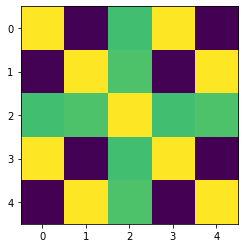

In [49]:
ax = plt.imshow(corr)

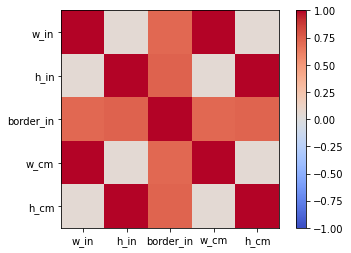

In [51]:
ax = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)
plt.colorbar()